**Importing Libraries**

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization

**Reading Data**

In [ ]:
#Declaring missing denoter
MissingValues = ["N/A"]

#Declaring Google Drive URL
GoogleDriveURL = "https://docs.google.com/spreadsheets/d/1OfxlATMBJJwN1VjW7sb0jKwIFywJcACbZYJHIxbjdVc/export?format=csv&gid=0"

#Reading the CSV file into a Pandas DataFrame
DataFrame = pd.read_csv(GoogleDriveURL, na_values=MissingValues)

In [ ]:
#Printing the DataFrame head
DataFrame.head()

,Ranking,Name,Park,Height,Speed,Length,Inversions,Opening Year
0,1,Steel Vengeance,Cedar Point,205.0,74.0,5740.0,4,2018.0
1,2,Iron Gwazi,Busch Gardens Tampa,206.0,76.0,4075.0,2,2022.0
2,3,Zadra,Energylandia,206.0,75.2,4317.6,3,2019.0
3,4,VelociCoaster,Islands of Adventure,155.0,70.0,4700.0,4,2021.0
4,5,Eejanaika,Fuji-Q Highland,249.3,78.3,3782.8,3,2006.0


**Checking the Data**

In [ ]:
#Printing the head of the data without the name and park columns
DataFrame = DataFrame.drop(columns=["Name", "Park"])
DataFrame.head()

,Ranking,Height,Speed,Length,Inversions,Opening Year
0,1,205.0,74.0,5740.0,4,2018.0
1,2,206.0,76.0,4075.0,2,2022.0
2,3,206.0,75.2,4317.6,3,2019.0
3,4,155.0,70.0,4700.0,4,2021.0
4,5,249.3,78.3,3782.8,3,2006.0


In [ ]:
#Seeing how many missing values there are per column
missing_values_per_column = DataFrame.isna().sum()
print(missing_values_per_column)

Ranking           0
Height          476
Speed           532
Length          302
Inversions        0
Opening Year     26
dtype: int64


**Dropping Records with NA Values**

In [ ]:
#Dropping records with NA values and adjusting the DataFrame
DataFrame = DataFrame.dropna()
DataFrame

,Ranking,Height,Speed,Length,Inversions,Opening Year
0,1,205.0,74.0,5740.0,4,2018.0
1,2,206.0,76.0,4075.0,2,2022.0
2,3,206.0,75.2,4317.6,3,2019.0
3,4,155.0,70.0,4700.0,4,2021.0
4,5,249.3,78.3,3782.8,3,2006.0
...,...,...,...,...,...,...
1852,1967,101.7,49.7,2171.9,5,1994.0
1855,1970,39.4,31.3,557.7,0,2023.0
1859,1975,50.0,25.7,1282.8,2,2004.0
1860,1976,36.1,26.7,1017.1,0,2014.0


**Examining the New Correlations after the Removal of Records with NA Values**

In [ ]:
#Calculating the correlations between the statistics and ranking
Correlations = DataFrame.corr(numeric_only=True)
CorrelationWithRanking = Correlations[["Ranking"]].drop(index="Ranking").sort_values(by="Ranking", ascending=False)

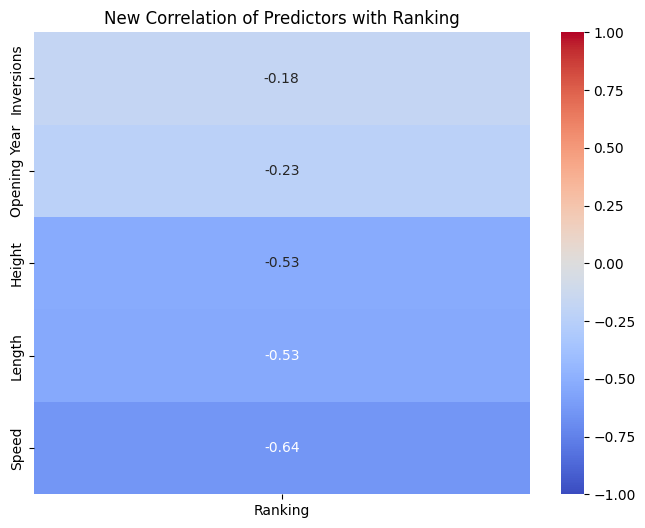

In [ ]:
#Plotting the correlations in a correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(CorrelationWithRanking, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title(f'New Correlation of Predictors with Ranking')
plt.show()

**Preprocessing/Train-Test Split for All Predictive Features**

In [ ]:
#Splitting the data into X and Y columns, with X denoting the predictors and Y denoting the target
X = DataFrame.drop(columns=["Ranking"])
Y = DataFrame["Ranking"]
#Performing a train/test split to provide a holdout test set to evaluate on
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=254)

In [ ]:
#Scaling the predictive features to ensure that differences in quantity are not unduly influencing the models
FeatureScaler = MinMaxScaler()
X_train_Scaled = FeatureScaler.fit_transform(X_train)
X_test_Scaled = FeatureScaler.transform(X_test)
print(X_train)

      Height  Speed  Length  Inversions  Opening Year
1676    27.9   21.7   679.2           0        1999.0
89     131.0   58.0  3300.0           3        2022.0
521     55.0   50.0  2650.0           0        1935.0
355     80.0   48.0  2800.0           0        1995.0
1680    27.9   21.7   679.1           0        1998.0
...      ...    ...     ...         ...           ...
1455    85.0   48.0  2050.0           3        1976.0
1516    64.0   37.3  1148.3           2        1982.0
699    180.0   37.3  2368.0           0        2007.0
116    126.3   62.1  4317.6           4        2021.0
1137    75.5   37.3   672.6           0        2024.0

[962 rows x 5 columns]


**Linear Regression (All Features)**

In [ ]:
#Decalring a linear regression model and fitting it on the training set
LinRegAll = LinearRegression()
LinRegAll.fit(X_train_Scaled, Y_train)

#Making predictions with it on the test set
Predictions = LinRegAll.predict(X_test_Scaled)

#Calculating the mean ranking in the test set
Y_mean = np.mean(Y_test)

#Calculating various metrics of success for the model
RSquared = LinRegAll.score(X_test_Scaled, Y_test)
MeanAbsoluteError = mean_absolute_error(Y_test, Predictions)
MeanSquaredError = mean_squared_error(Y_test, Predictions)
RMSE = np.sqrt(MeanSquaredError)
ScatterIndex = RMSE/Y_mean

#Outputting various metrics of success for the model
print("R Squared:",RSquared)
print("Mean Absolute Error:",MeanAbsoluteError)
print("Mean Squared Error:",MeanSquaredError)
print("Root Mean Squared Error:",RMSE)
print("Scatter Index:",ScatterIndex)

R Squared: 0.42474918014729024
Mean Absolute Error: 334.5745863545913
Mean Squared Error: 179177.7380348018
Root Mean Squared Error: 423.2939144788191
Scatter Index: 0.5055971600661916


**Random Forest Regression (All Features)**

In [ ]:
RandomForestRegAll = RandomForestRegressor(random_state=254)
RandomForestRegAll.fit(X_train_Scaled, Y_train)

# Parameter grid for GridSearch
ParameterGrid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
}

# Set up the grid search
Search = GridSearchCV(estimator=RandomForestRegAll, param_grid=ParameterGrid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit grid search to the training data
Search.fit(X_train_Scaled, Y_train)

# Retrieve the best parameters and model
BestParameters = Search.best_params_
print("Best Parameters:", BestParameters)

#Declaring the best model from the grid search and using it to make predictions
BestModel = Search.best_estimator_
Predictions = BestModel.predict(X_test_Scaled)

#Calculating the mean ranking present in the test set
Y_mean = np.mean(Y_test)

#Calculating various metrics of success for the model
RSquared = BestModel.score(X_test_Scaled, Y_test)
MeanAbsoluteError = mean_absolute_error(Y_test, Predictions)
MeanSquaredError = mean_squared_error(Y_test, Predictions)
RMSE = np.sqrt(MeanSquaredError)
ScatterIndex = RMSE/Y_mean

#Outputting various metrics of success for the model
print("R Squared:",RSquared)
print("Mean Absolute Error:",MeanAbsoluteError)
print("Mean Squared Error:",MeanSquaredError)
print("Root Mean Squared Error:",RMSE)
print("Scatter Index:",ScatterIndex)

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
R Squared: 0.6523875682036129
Mean Absolute Error: 231.35901741538513
Mean Squared Error: 108273.48191872389
Root Mean Squared Error: 329.04936091523393
Scatter Index: 0.39302814595191227


**Neural Network (All Features)**

In [ ]:
#Building the neural network
NeuralNetworkAll = Sequential()
NeuralNetworkAll.add(Dense(64, input_dim=X_train_Scaled.shape[1], activation='relu'))
NeuralNetworkAll.add(Dense(128, activation='relu'))
NeuralNetworkAll.add(Dense(64, activation='relu'))
NeuralNetworkAll.add(Dropout(rate=0.3))
NeuralNetworkAll.add(Dense(32, activation='relu'))
NeuralNetworkAll.add(Dense(1))

#Declaring an Adam optimiser
Optimiser = keras.optimizers.Adam(learning_rate=0.0005)

#Declaring an early stopping callback
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

#Declaring a learning rate scheduler
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6)

#Compiling the neural network
NeuralNetworkAll.compile(optimizer=Optimiser, loss='mean_squared_error')

#Training the neural network
History = NeuralNetworkAll.fit(X_train_Scaled, Y_train, epochs=1000, batch_size=32, validation_split=0.2, callbacks=[early_stopping, lr_scheduler], verbose=1)

#Evaluating the neural network on the test dataset
TestRMSE = NeuralNetworkAll.evaluate(X_test_Scaled, Y_test)

#Calculating the mean ranking within the test set
Y_mean = np.mean(Y_test)

#Making predictions with the neural network
Predictions = NeuralNetworkAll.predict(X_test_Scaled)

#Calculating various metrics of success for the model
RSquared = r2_score(Y_test, Predictions)
MeanAbsoluteError = mean_absolute_error(Y_test, Predictions)
MeanSquaredError = mean_squared_error(Y_test, Predictions)
RMSE = np.sqrt(MeanSquaredError)
ScatterIndex = RMSE/Y_mean

#Outputting various metrics of success for the model
print("R Squared:",RSquared)
print("Mean Absolute Error:",MeanAbsoluteError)
print("Mean Squared Error:",MeanSquaredError)
print("Root Mean Squared Error:",RMSE)
print("Scatter Index:",ScatterIndex)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 1088154.7500 - val_loss: 912335.8125 - learning_rate: 5.0000e-04
Epoch 2/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1070244.8750 - val_loss: 909245.8750 - learning_rate: 5.0000e-04
Epoch 3/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1110997.8750 - val_loss: 898323.6250 - learning_rate: 5.0000e-04
Epoch 4/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1010329.5625 - val_loss: 864911.2500 - learning_rate: 5.0000e-04
Epoch 5/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 978594.5000 - val_loss: 779556.1250 - learning_rate: 5.0000e-04
Epoch 6/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 843915.1250 - val_loss: 619784.1875 - learning_rate: 5.0000e-04
Epoch 7/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 712394.6250 - val_loss: 447644.4375 - learning_rate: 5.0000e-04
Epoch 8/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 510981.1875 - val_loss: 411784.4062 - learning_rate: 5.0000e-04
Epo

**Feature Selection using Correlation**

In [ ]:
#Calculating the predictors' correlation with the target and removing features that do not share a significant correlation with the target
Correlation = DataFrame.corr()
CorrelationWithTarget = abs(Correlation["Ranking"])
CorrelatedPredictors = CorrelationWithTarget[CorrelationWithTarget>0.3].index.values.tolist()
CorrelatedPredictors.remove("Ranking")
print("Correlated:",CorrelatedPredictors)
X_Correlated = DataFrame[CorrelatedPredictors]
Y_Correlated = DataFrame["Ranking"]

Correlated: ['Height', 'Speed', 'Length']


**Preprocessing/Train-Test Split for Correlated Features Only**

In [ ]:
#Performing a train/test split so that a holdout test set can be provided
X_Correlated_train, X_Correlated_test, Y_Correlated_train, Y_Correlated_test = train_test_split(X_Correlated, Y_Correlated, test_size=0.2, random_state=254)

In [ ]:
#Scaling features so that larger features do not have undue influence on the models
CorrelatedFeatureScaler = MinMaxScaler()
X_Correlated_train_Scaled = CorrelatedFeatureScaler.fit_transform(X_Correlated_train)
X_Correlated_test_Scaled = CorrelatedFeatureScaler.transform(X_Correlated_test)

**Linear Regression (Correlated Features)**

In [ ]:
#Declaring a linear regression model and fitting it to the training set
LinRegCorrelated = LinearRegression()
LinRegCorrelated.fit(X_Correlated_train_Scaled, Y_Correlated_train)

#Making predictions on the test set
Predictions = LinRegCorrelated.predict(X_Correlated_test_Scaled)

#Calculating the mean ranking in the test set
Y_Correlated_mean = np.mean(Y_Correlated_test)

#Calculating various metrics of success for the model
RSquared = LinRegCorrelated.score(X_Correlated_test_Scaled, Y_test)
MeanAbsoluteError = mean_absolute_error(Y_Correlated_test, Predictions)
MeanSquaredError = mean_squared_error(Y_Correlated_test, Predictions)
RMSE = np.sqrt(MeanSquaredError)
ScatterIndex = RMSE/Y_Correlated_mean

#Outputting various metrics of success for the model
print("R Squared:",RSquared)
print("Mean Absolute Error:",MeanAbsoluteError)
print("Mean Squared Error:",MeanSquaredError)
print("Root Mean Squared Error:",RMSE)
print("Scatter Index:",ScatterIndex)

R Squared: 0.3676886353251714
Mean Absolute Error: 354.1167682172174
Mean Squared Error: 196950.81892302804
Root Mean Squared Error: 443.79141375541286
Scatter Index: 0.5300800951338139


**Random Forest Regression (Correlated Features)**

In [ ]:
#Declaring a random forest model and fitting it to the training data
RandomForestRegCorrelated = RandomForestRegressor(random_state=254)
RandomForestRegCorrelated.fit(X_Correlated_train_Scaled, Y_train)

# Parameter grid for GridSearch
ParameterGrid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
}

#Setting up the grid search
Search = GridSearchCV(estimator=RandomForestRegCorrelated, param_grid=ParameterGrid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

#Fitting grid search to the training data
Search.fit(X_Correlated_train_Scaled, Y_Correlated_train)

#Retrieving the best parameters
BestParameters = Search.best_params_
print("Best Parameters:", BestParameters)

#Retrieving the best model and making predictions on the test set with it
BestModel = Search.best_estimator_
Predictions = BestModel.predict(X_Correlated_test_Scaled)

#Calculating the mean ranking within the test set
Y_Correlated_mean = np.mean(Y_Correlated_test)

#Calculating various metrics of success for the model
RSquared = BestModel.score(X_Correlated_test_Scaled, Y_Correlated_test)
MeanAbsoluteError = mean_absolute_error(Y_Correlated_test, Predictions)
MeanSquaredError = mean_squared_error(Y_Correlated_test, Predictions)
RMSE = np.sqrt(MeanSquaredError)
ScatterIndex = RMSE/Y_mean

#Outputting various metrics of success for the model
print("R Squared:",RSquared)
print("Mean Absolute Error:",MeanAbsoluteError)
print("Mean Squared Error:",MeanSquaredError)
print("Root Mean Squared Error:",RMSE)
print("Scatter Index:",ScatterIndex)

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
R Squared: 0.5828430240248579
Mean Absolute Error: 260.0509356535416
Mean Squared Error: 129935.04881888267
Root Mean Squared Error: 360.46504521088127
Scatter Index: 0.4305521457499536


**Neural Network (Correlated Features)**

In [ ]:
#Building the neural network
NeuralNetworkCorrelated = Sequential()
NeuralNetworkCorrelated.add(Dense(64, input_dim=X_Correlated_train_Scaled.shape[1], activation='relu'))
NeuralNetworkCorrelated.add(Dense(128, activation='relu'))
NeuralNetworkCorrelated.add(Dense(64, activation='relu'))
NeuralNetworkCorrelated.add(Dropout(rate=0.3))  # Dropout regularization
NeuralNetworkCorrelated.add(Dense(32, activation='relu'))
NeuralNetworkCorrelated.add(Dense(1))  # Output layer

#Declaring an optimiser
Optimiser = keras.optimizers.Adam(learning_rate=0.0005)

#Declaring an early stopping callback
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

#Declaring a learning rate scheduler
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6)

#Compiling the neural network
NeuralNetworkCorrelated.compile(optimizer=Optimiser, loss='mean_squared_error')

#Training the neural network
History = NeuralNetworkCorrelated.fit(X_Correlated_train_Scaled, Y_Correlated_train, epochs=1000, batch_size=32, validation_split=0.2, callbacks=[early_stopping, lr_scheduler], verbose=1)

#Evaluating the neural network
TestRMSE = NeuralNetworkCorrelated.evaluate(X_Correlated_test_Scaled, Y_Correlated_test)

#Calculating the mean ranking value within the test set
Y_Correlated_mean = np.mean(Y_Correlated_test)

#Making predictions on the test set with the neural network
Predictions = NeuralNetworkCorrelated.predict(X_Correlated_test_Scaled)

#Calculating various metrics of success for the model
RSquared = r2_score(Y_Correlated_test, Predictions)
MeanAbsoluteError = mean_absolute_error(Y_Correlated_test, Predictions)
MeanSquaredError = mean_squared_error(Y_Correlated_test, Predictions)
RMSE = np.sqrt(MeanSquaredError)
ScatterIndex = RMSE/Y_Correlated_mean

#Outputting various metrics of success for the model
print("R Squared:",RSquared)
print("Mean Absolute Error:",MeanAbsoluteError)
print("Mean Squared Error:",MeanSquaredError)
print("Root Mean Squared Error:",RMSE)
print("Scatter Index:",ScatterIndex)

Epoch 1/1000


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 1059269.8750 - val_loss: 913007.4375 - learning_rate: 5.0000e-04
Epoch 2/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1056146.3750 - val_loss: 911581.8750 - learning_rate: 5.0000e-04
Epoch 3/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1066765.2500 - val_loss: 905498.3750 - learning_rate: 5.0000e-04
Epoch 4/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1030049.4375 - val_loss: 882432.8125 - learning_rate: 5.0000e-04
Epoch 5/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1061356.8750 - val_loss: 816922.6250 - learning_rate: 5.0000e-04
Epoch 6/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 905472.6875 - val_loss: 673966.5625 - learning_rate: 5.0000e-04
Epoch 7/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 774373.1875 - val_loss: 496340.7812 - learning_rate: 5.0000e-04
Epoch 8/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 573858.0000 - val_loss: 443890.8750 - learning_rate: 5.0000e-04
Epoch 9/1000
25